In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2 as cv

#import sounddevice as sd
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

from tensorflow.keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

from sklearn.model_selection import train_test_split

np.random.seed(1)

In [2]:
train_images = []       
train_labels = []
shape = (100,93)  
train_path = './utasitasok-spec-crop/0all_cropped/'
for filename in os.listdir('./utasitasok-spec-crop/0all_cropped/'):
    if filename.split('.')[1] == 'png':
        img = cv.imread(os.path.join(train_path,filename))
        
        # Spliting file names and storing the labels for image in list
        train_labels.append(filename.split('-')[0])
        
        # Resize all images to a specific shape
        img = cv.resize(img,shape)
        
        train_images.append(img)
        
train_labels = pd.get_dummies(train_labels).values

train_images = np.array(train_images)

x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

In [3]:
test_images = []
test_labels = []
shape = (100,93)  
test_path = './utasitasok-spec-crop/0all_cropped_test/'

for filename in os.listdir('./utasitasok-spec-crop/0all_cropped_test/'):
    if filename.split('.')[1] == 'png':
        img = cv.imread(os.path.join(test_path,filename))
        
        # Spliting file names and storing the labels for image in list
        test_labels.append(filename.split('-')[0])
        
        # Resize all images to a specific shape
        img = cv.resize(img,shape)
        
        test_images.append(img)
        
# imgs = cv.imread(os.path.join("D:\Egyetem\projektmunka\python","out.png"))
# imgs = cv.resize(imgs,shape)
# test_images.append(imgs)
# Converting test_images to array
test_images = np.array(test_images)

[0 0 0 0 0 0 1]


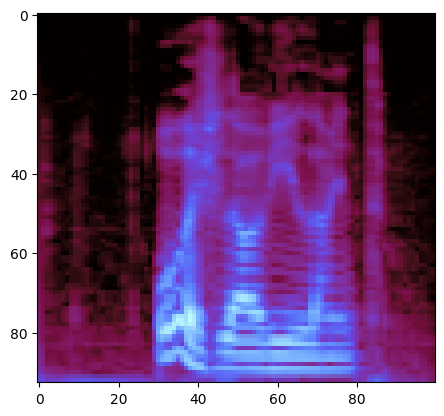

In [4]:
print(train_labels[330])
plt.imshow(train_images[330])

In [5]:
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(93,100,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(7,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 91, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 89, 96, 30)        8670      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 44, 48, 30)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 42, 46, 30)        8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 21, 23, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 19, 21, 30)        8

In [7]:
history = model.fit(x_train,y_train,epochs=35,batch_size=10,validation_data=(x_val,y_val))

Epoch 1/35
53/53 [==============================] - 4s 10ms/step - loss: 2.0752 - acc: 0.1374 - val_loss: 1.9462 - val_acc: 0.1591
Epoch 2/35
53/53 [==============================] - 0s 5ms/step - loss: 1.9599 - acc: 0.1374 - val_loss: 2.0309 - val_acc: 0.1591
Epoch 3/35
53/53 [==============================] - 0s 6ms/step - loss: 1.9556 - acc: 0.1298 - val_loss: 1.9477 - val_acc: 0.1023
Epoch 4/35
53/53 [==============================] - 0s 5ms/step - loss: 1.9456 - acc: 0.1412 - val_loss: 1.9485 - val_acc: 0.1023
Epoch 5/35
53/53 [==============================] - 0s 5ms/step - loss: 1.9455 - acc: 0.1565 - val_loss: 1.9492 - val_acc: 0.1023
Epoch 6/35
53/53 [==============================] - 0s 5ms/step - loss: 1.9454 - acc: 0.1565 - val_loss: 1.9502 - val_acc: 0.1023
Epoch 7/35
53/53 [==============================] - 0s 5ms/step - loss: 1.9452 - acc: 0.1565 - val_loss: 1.9507 - val_acc: 0.1023
Epoch 8/35
53/53 [==============================] - 0s 5ms/step - loss: 1.9452 - acc: 0.1

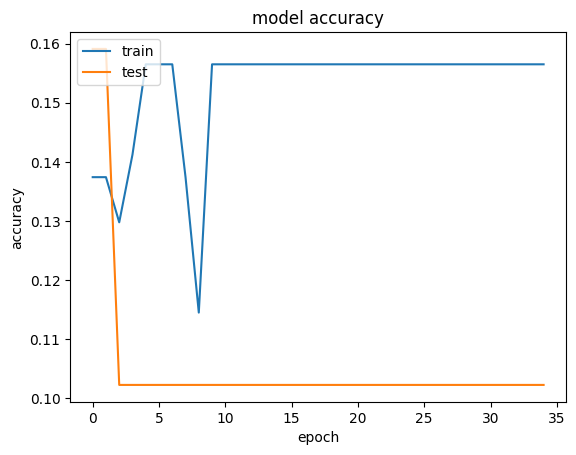

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

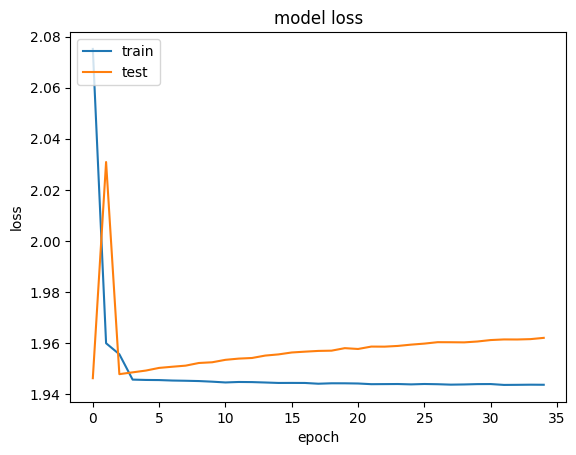

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
imgs = cv.imread(os.path.join("./utasitasok-spec-crop/tv_be-crop/tv_be-cropped-12.png"))
shape = (100,93)  

imgs = cv.resize(imgs,shape)
imgs=imgs.reshape(1,93,100,3)

imgs.shape

# imgs=np.array(imgs)
predict = model.predict(np.array(imgs))

1/1 [==============================] - 0s 109ms/step


In [11]:
output = { 0:'ajtobe',1:'klimale',2:'ido',3:'tvbe',4:'vicc',5:'villanyfel',6:'villanyle'}
print("Predicted :- ",output[np.argmax(predict)])

Predicted :-  ajtobe


In [12]:
#model.save('./saved_keras_models/batch10epoch35/')